<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/intro_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2017 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.3.5'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [8]:
import numpy as np
data = np.array(['a','b','c','d'])
s = pd.Series(data)
s


0    a
1    b
2    c
3    d
dtype: object

In [9]:
#Series using the Dict
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data)
s


a    0.0
b    1.0
c    2.0
dtype: float64

In [10]:
#Data Frame from dictionary
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
df

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [11]:
#Let's make a dataframe
import pandas as pd
import random
random.seed(3)
names = ["Jess", "Jordan", "Sandy", "Ted", "Barney", "Tyler"]
ages = [random.randint(18, 35) for x in range(len(names))]
people = {"names": names, "ages": ages}

#dataframe
df = pd.DataFrame.from_dict(people)
print(df)

    names  ages
0    Jess    25
1  Jordan    35
2   Sandy    22
3     Ted    29
4  Barney    33
5   Tyler    20


#Indexing by Column
Accessing data by a column is the same as accessing data from a dictionary with the key. Within the first set of brackets, you put the column name that you would like to access. If you’d like to access a specific record within that column, you use a second set of brackets with the index:


In [12]:
#directly selecting a column in Pandas
print(df["ages"])
print(df["ages"][3]) #Select the value of "ages" in the fourth row

0    25
1    35
2    22
3    29
4    33
5    20
Name: ages, dtype: int64
29


#Indexing by Record
###When you need to access an entire record, you must use loc. This allows us to specify the record location via the index. Let’s access the entire first record, then the name within that record:


In [13]:
#directly selecting a record in Pandas using .loc
print( df.loc[0] )
print( df.loc[0]["names"] )        # selecting the value at record 0 in the "names" column

names    Jess
ages       25
Name: 0, dtype: object
Jess


#Slicing a DataFrame
###When you want to access a specific number of records, you must slice the DataFrame. Slicing in Pandas works the exact same way as a Python list does, using start, stop, and step within a set of brackets. Let’s access the records from index 2 up to 5:


In [14]:
#slicing a Dataframe to grab specific records
print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


#Build in Method
##head

In [15]:
#accessiong the top 5 records using .head()
df.head()

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


#tail()

In [16]:
#accessing the bottom 3 records using .tail()
df.tail(3)

,names,ages
3,Ted,29
4,Barney,33
5,Tyler,20


#Keys()
###Sometimes you’ll need the column names. Whether you’re making a modular script or analyzing the data you’re working with, using the keys( ) method will help:


In [17]:
df.keys()

Index(['names', 'ages'], dtype='object')

#Indexing by Column
###Accessing data by a column is the same as accessing data from a dictionary with the key. Within the first set of brackets, you put the column name that you would like to access. 

In [18]:
headers = df.keys()
print(headers)
df.columns


Index(['names', 'ages'], dtype='object')


Index(['names', 'ages'], dtype='object')

#.shape
The shape of a DataFrame descrive the number of records by the number of columns. It's always important to check the shape to ensure you're working with the proper amout of data

In [19]:
df.shape

(6, 2)

#describe()
####The describe method will give you a base analysis for all numerical data. You’ll be able to view min, max, 25%, 50%, mean, etc., on all columns just by calling this method on the DataFrame. This information is helpful to start your analysis but generally won’t answer those questions you’re looking for. Instead, we can use this method as a guideline of where to start:


In [20]:
df.describe()

,ages
count,6.000000
mean,27.333333
std,6.022181
min,20.000000
25%,22.750000
50%,27.000000
75%,32.000000
max,35.000000


#sort_values()
When you need to sort a DataFrame based on column information, you use this method. You can pass in one or multiple columns to be sorted by. When passing multiple, you must pass them in as a list of column names.

In [21]:
df.sort_values("ages")

,names,ages
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


<h2>Filter </h2> 
pandas filter() function filters the DataFame for rows and columns. The returned DataFrame contains only rows and columns that are specified with the function. It doesn’t update the existing DataFrame instead it always returns a new one.<br/>
<b> dataframe.filter(items=None, like=None, regex=None, axis=None) </b><br/>
**item** – Takes list of axis labels that you wanted to filter. <br/>
**like** – Takes axis string label that you wanted to filter <br/>
**regex** – regular expression <br/>
**axis** – {0 or ‘index’, 1 or ‘columns’, None}, default None. When not specified it used columns. <br/>


In [22]:
df2 = df.filter(items=["names"])
df2.head()

,names
0,Jess
1,Jordan
2,Sandy
3,Ted
4,Barney


In [23]:
#Load the titanic data-set
from pandas.io.parsers.readers import read_csv
df2 = read_csv("https://raw.githubusercontent.com/vsbca/Data-Science/master/Data/titanic.csv")
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Where() <h3>
Where function is similar to if-then/if-else that is used to check the one or multiple conditions of an expression in the Dataframe and replace with another value when the condition becomes False <br/>
Syntax: <br/>
<b>Dataframe.where(condition, other=None, inplace=False, axis=None, level=None, errors=None, try_cast=None)</b> <br/>
<b>condition </b> – Accepts one or more conditions. Takes eithere bool Series/DataFrame, array-like, or callable
<b>other </b> – Value to replace with. Takes either scalar, Series/DataFrame, or callable <br/>
<b>inplace </b> – If True, it updates the existing DataFrame and return None. Default set to False. <br/>
<b>axis </b>– rows/columns axis. Takes int, default None <br/>
<b>level – </b> Alignment level. <br/>
<b>errors – </b> Specify whether to raise any error in event of failure. Accepts str, {‘raise’, ‘ignore’}, default ‘raise’
try_cast – Cast teh result basck to input type. (Available since 1.3.0 version)



In [ ]:
#Show me all the data where the passenger is above 30
cond1 = df2.Age > 30.0
cond2 = df2.Sex == "female"
#List down all the data where age is above 30 and sex is female
df2.where(cond1 & cond2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Query() :</b> method is used to query the rows based on the expression (single or multiple column conditions) provided and returns a new DataFrame. In case you wanted to update the existing referring DataFrame use inplace=True argument. <br/>
Query method syntax <br/>
<b>Dataframe.query(expr, inplace=False, **kwargs) </b> <br/>
<b>expr - </b> expression takes condition to query rows. <br/>
<b>inplace - </b> Defaults to False, when set to True, it updates the referring Dataframe and query() method returns None.


In [ ]:
df10 = df2.query("Sex == 'female'")
df10.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
#Check if all column value of Age is INT
df2["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<h3><b>Apply() - </b> </h3> method you can execute a function to a single column, all and list of multiple columns (two or more). In this article, I will cover how to apply() a function on values of a selected single, multiple, all columns. For example, let’s say we have three columns and would like to apply a function on a single column without touching other two columns and return a DataFrame with three columns.<br/>
<b>DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)</b>


In [31]:
def convert_toint(x):
  return int(x)

#change the Age column to INT from Float
df2[~df2['Age'].isnull()]["Age"].apply(convert_toint)


0      22
1      38
2      26
3      35
4      35
       ..
885    39
886    27
887    19
889    26
890    32
Name: Age, Length: 714, dtype: int64

#Filtration
###Let's look at how to filter DataFrame for information that meets a specific condition

##<b>Conditionals
###Rather than filtering out information, we can create a boolean data type column that represents the condition we’re checking. Let’s take our current DataFrame and write a condition that shows those who are 21 or older and can drink:


In [ ]:
can_drink = df["ages"] > 21
can_drink

0     True
1     True
2     True
3     True
4     True
5    False
Name: ages, dtype: bool

#<b>Subsetting
###When you need to filter out records but retain the information within the DataFrame you need to use a concept called subsetting. We’ll use the same condition as earlier, except this time we’ll use it to filter out records rather than create a true-false representation:


In [ ]:
df[df["ages"] > 25]

,names,ages
1,Jordan,35
3,Ted,29
4,Barney,33


#Generating a new Column with Data
#####To create a new column within a DataFrame, you use the same syntax as if you were adding a new key-value pair into a dictionary. Let’s create a column of fake data that represents how long the people within our DataFrame have been customers with our company:

In [ ]:
random.seed(321)
tenure = [random.randint(0,10) for x in range(len(df))]

df["tenure"] = tenure
df.head()

,names,ages,tenure
0,Jess,25,4
1,Jordan,35,6
2,Sandy,22,2
3,Ted,29,5
4,Barney,33,8


#**.apply()**
####Adding new columns based on current data is known as “feature engineering.” It makes up a good portion of a data analysts’ job. Often, you won’t be able to answer the questions you have from the data you collect. Instead, you need to create your own data that is useful to answering questions. For this example, let’s try to answer the following question: “What age group does each customer belong to?”. You could look at the persons’ age and assume their age group; however, we want to make it easier than that. In order to answer this question easily, we’ll need to feature engineer a new column that represents each customer’s age group. We can do this by using the apply method on the DataFrame. The apply method takes in each record, applies the function passed, and sets the value returned as the new column data.

In [ ]:
#feature engineering a new column from known data using a UDF
def ageGroup(age):
  return "Teenager" if age < 21 else "Aduit"

df["age_group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
0,Jess,25,4,Aduit
1,Jordan,35,6,Aduit
2,Sandy,22,2,Aduit
3,Ted,29,5,Aduit
4,Barney,33,8,Aduit
5,Tyler,20,7,Teenager


#groupby()
####In order to condense the information down to a summary of statistics, we’ll need to use the groupby method that Pandas has. Whenever you group information together, you need to use an aggregate function to let the program know how to group the information together. For now, let’s count how many records of each age group there are within our DataFrame:


In [ ]:
df.groupby("age_group", as_index=False).count( ).head()


,age_group,names,ages,tenure
0,Aduit,5,5,5
1,Teenager,1,1,1


#mean()
####Instead of counting how many records there are in each category, let’s go ahead and find the averages of each column by using the mean method. We’ll group based on the same column:


In [ ]:
df.groupby("age_group", as_index=False).mean().head()

,age_group,ages,tenure
0,Aduit,28.8,5.0
1,Teenager,20.0,7.0


#drop_duplicate()
####Way too often will you see data with duplicate information, or just duplicate IDs. It’s imperative that you remove all duplicate records as it will skew your data, resulting in incorrect answers. You can remove duplicate records based on a single column or an entire record being identical. In our case, let’s remove duplicates based on similar names, which will remove the record we just added into our

In [ ]:
#removing duplicates based on same names
df = df.drop_duplicates(subset="names")
df.head(10)

,names,ages,tenure,age_group
0,Jess,25,4,Aduit
1,Jordan,35,6,Aduit
2,Sandy,22,2,Aduit
3,Ted,29,5,Aduit
4,Barney,33,8,Aduit
5,Tyler,20,7,Teenager


#Chart

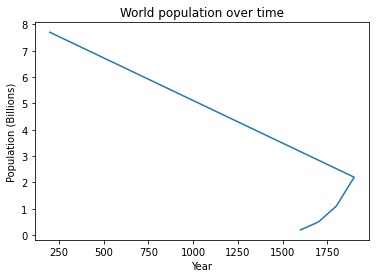

In [ ]:
import matplotlib.pyplot as plt
x , y = [1600, 1700, 1800, 1900, 200], [0.2, 0.5, 1.1, 2.2, 7.7]

plt.plot(x, y)
plt.title("World population over time")
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.show()


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [ ]:
#invite people for the Kaggle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/vsbca/Data-Science/master/Data/house_price.csv", sep=",")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [ ]:
#Show top 5 rows
df.shape

(1460, 81)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff190b76790>]],
      dtype=object)

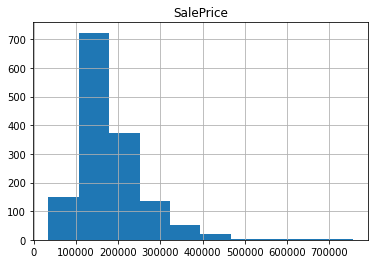

In [ ]:
#histogram
df.hist('SalePrice')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


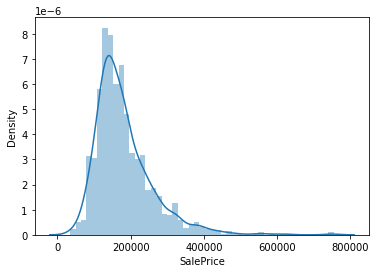

In [ ]:
#histogram
sns.distplot(df['SalePrice'])

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff190d62f10>]],
      dtype=object)

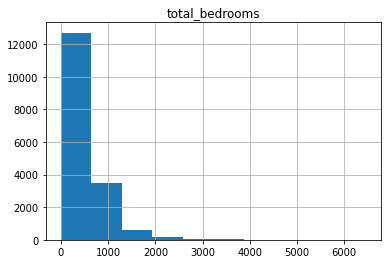

In [ ]:
df.hist("total_bedrooms")

In [ ]:
print(type(cities[0:2]))
cities[0:2]

In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [ ]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [ ]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [ ]:
population.head()

0     852469
1    1015785
2     485199
dtype: int64


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [ ]:
# Your code here

### Solution

Click below for a solution.

In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
city_names.index

In [ ]:
cities.index

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [ ]:
cities.reindex([2, 0, 1])

Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [ ]:
cities.reindex(np.random.permutation(cities.index))

For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [ ]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [ ]:
cities.reindex([0, 4, 5, 2])

This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.